<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/16_4_3_Assignment_Coefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ANSWER TO 16.4 QUESTION 3 NEAR BOTTOM

#**Assignment: predicting house prices**

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database.

 You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

postgres_user = 'dsbc_student'

postgres_pw = '7*.8G9QH21'

postgres_host = '142.93.121.174'

postgres_port = '5432'

postgres_db = 'houseprices'

Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

**Investigate the data, and do any necessary data cleaning**.

Explore the data and find some variables that you think would be useful in predicting house prices.

Build your initial model using these features and estimate the parameters using OLS.

**Spend up to 4 hours on this assignment**. When you are done and have submitted a link to your notebook below, feel free to take a look at this example solution.



In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db =  'houseprices'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hp0 = pd.read_sql_query('select * FROM houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
hp=hp0.copy()

In [85]:
hp.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500


In [0]:
#hp.info()

In [0]:
hp.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**FIND COLUMNS THAT HAVE  NULLS**

In [0]:
q=hp.columns[hp.isna().any()].tolist()

In [0]:
#hp.loc[:, hp.isna().any()]

In [0]:
hp_nulls=hp[q]

In [0]:
#hp_nulls.isnull().sum()

**Percentage null**

In [0]:
hp_nulls.isnull().sum()*100/hp_nulls.isnull().count()

lotfrontage     17.739726
alley           93.767123
masvnrtype       0.547945
masvnrarea       0.547945
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
electrical       0.068493
fireplacequ     47.260274
garagetype       5.547945
garageyrblt      5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
poolqc          99.520548
fence           80.753425
miscfeature     96.301370
dtype: float64

**Dropping coulumns alley,fireplacequ,poolqc,fence,miscfeature , lotfrontage-- too many missing values**

In [0]:
hp2=hp.drop(columns=['alley','fireplacequ','poolqc','fence','miscfeature','lotfrontage'])

In [0]:
hp2.head(3)

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


In [0]:
hp2.isnull().sum()

id               0
mssubclass       0
mszoning         0
lotarea          0
street           0
                ..
mosold           0
yrsold           0
saletype         0
salecondition    0
saleprice        0
Length: 75, dtype: int64

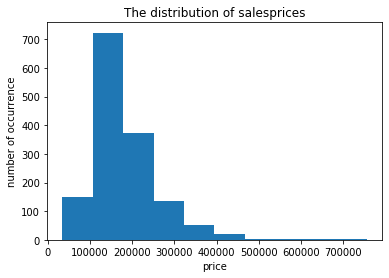

In [0]:
plt.hist(hp2.saleprice)
plt.title("The distribution of salesprices")
plt.xlabel("price")
plt.ylabel("number of occurrence")
plt.show()

In [0]:
len(list(hp2))

75

In [0]:
#list(zip(list(hp2.nunique()),list(hp2)))

In [0]:
#hp2['lotshape']

type(hp2['lotfrontage'][0])

fill_list=list(hp2)

for col in fill_list:
  if type(col[0])!=str:
    hp2[col]=hp2.apply(lambda x: x.fillna(x.interpolate(limit_direction='both')))

In [0]:
#hp2.info()

In [87]:
hp2['poolarea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: poolarea, dtype: int64

In [0]:
hp2['screenporch'].value_counts()

0      1344
192       6
224       5
120       5
189       4
       ... 
182       1
440       1
178       1
312       1
480       1
Name: screenporch, Length: 76, dtype: int64

In [0]:
hp2['threessnporch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: threessnporch, dtype: int64

In [0]:
hp2['openporchsf'].value_counts()

0      656
36      29
48      22
20      21
40      19
      ... 
159      1
156      1
148      1
142      1
119      1
Name: openporchsf, Length: 202, dtype: int64

In [0]:
hp2['enclosedporch'].value_counts()

0      1252
112      15
96        6
120       5
144       5
       ... 
174       1
177       1
183       1
189       1
552       1
Name: enclosedporch, Length: 120, dtype: int64

In [0]:
hp2['bsmtfinsf2'].value_counts()

0       1293
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: bsmtfinsf2, Length: 144, dtype: int64

In [0]:
hp2['lowqualfinsf'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: lowqualfinsf, dtype: int64

In [0]:
hp2['secondflrsf'].value_counts()

0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: secondflrsf, Length: 417, dtype: int64

In [0]:
hp2['wooddecksf'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: wooddecksf, Length: 274, dtype: int64

ALL THESE COLUMNS ARE MOSTLY ZEROES SO I WILL DROP


In [0]:
hp2=hp2.drop(columns=['secondflrsf','lowqualfinsf','bsmtfinsf2','enclosedporch','openporchsf','threessnporch','screenporch','poolarea','wooddecksf'])

In [0]:
hp2.head(3)

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,9,2008,WD,Normal,223500


In [0]:
#hp3.info()

WILL CHECK THE 6 CONTINUOUS COLUMNS FOR OUTLIERS

In [0]:
hp2_continue=hp2[['lotarea','masvnrarea','bsmtfinsf1','firstflrsf','grlivarea','garagearea']]

In [90]:
hp2_continue.head()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea
0,8450,196.0,706,856,1710,548
1,9600,0.0,978,1262,1262,460
2,11250,162.0,486,920,1786,608
3,9550,0.0,216,961,1717,642
4,14260,350.0,655,1145,2198,836


In [91]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(hp2_continue))
z1=(z>1)
z2=(z>2)
print(z)

[[0.20714171        nan 0.57542484 0.79343379 0.37033344 0.35100032]
 [0.09188637        nan 1.17199212 0.25714043 0.48251191 0.06073101]
 [0.07347998        nan 0.09290718 0.62782603 0.51501256 0.63172623]
 ...
 [0.14781027        nan 0.36987111 0.06565646 1.56964722 1.03391416]
 [0.08016039        nan 0.86554834 0.21898188 0.83278768 1.09005935]
 [0.05811155        nan 0.84738933 0.2416147  0.49393395 0.9216238 ]]


In [92]:
z1

array([[False, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False, False]])

**SOME VALUES GREATER THAN ONE STD AWAY**



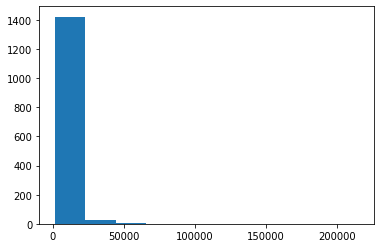

In [0]:
plt.hist(hp2['lotarea'])
plt.show()

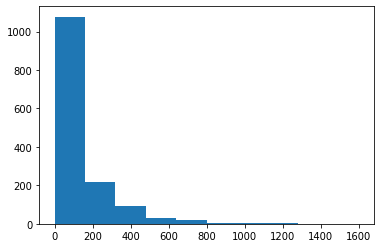

In [0]:
plt.hist(hp2['masvnrarea'])
plt.show()

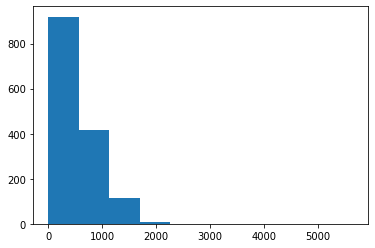

In [0]:
plt.hist(hp2['bsmtfinsf1'])
plt.show()

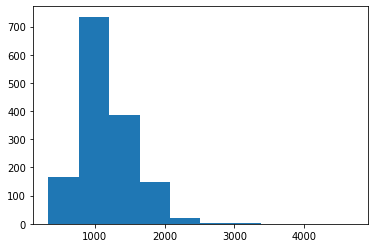

In [0]:
plt.hist(hp2['firstflrsf'])
plt.show()

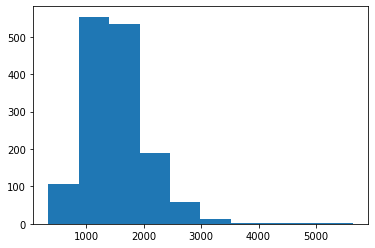

In [0]:
plt.hist(hp2['grlivarea'])
plt.show()

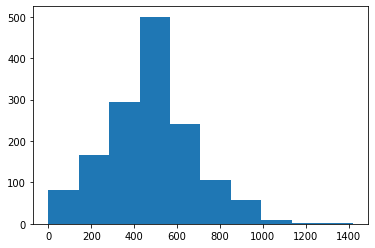

In [0]:
plt.hist(hp2['garagearea'])
plt.show()

///////////////////////////////////////////////////////////////////////

  **BREAK**

**INTERPOLATE**???

**ARE THERE ANY NaN LEFT??????????**

fill_list=list(hp2_continue)

for col in fill_list:
  
    hp2_continue[col]=hp2_continue.apply(lambda x: x.fillna(x.interpolate(limit_direction='both')))

In [0]:
hp2_continue.head()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea
0,8450,196.0,706,856,1710,548
1,9600,0.0,978,1262,1262,460
2,11250,162.0,486,920,1786,608
3,9550,0.0,216,961,1717,642
4,14260,350.0,655,1145,2198,836


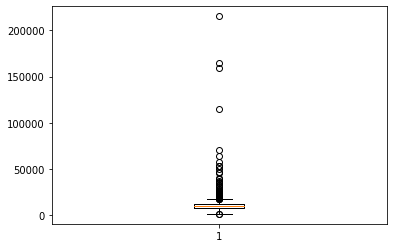

In [0]:
plt.boxplot(hp2_continue['lotarea'])
plt.show()

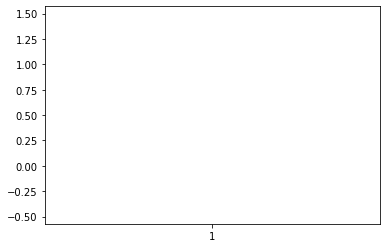

In [0]:
plt.boxplot(hp2_continue['masvnrarea'])
plt.show()

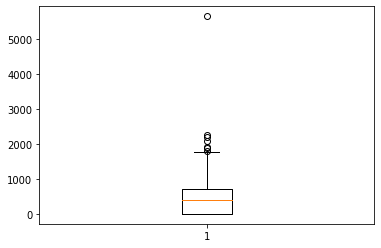

In [0]:
plt.boxplot(hp2_continue['bsmtfinsf1'])
plt.show()

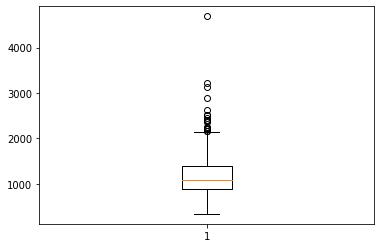

In [0]:
plt.boxplot(hp2_continue['firstflrsf'])
plt.show()

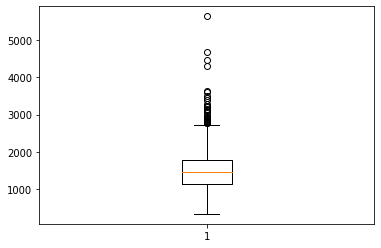

In [0]:
plt.boxplot(hp2_continue['grlivarea'])
plt.show()

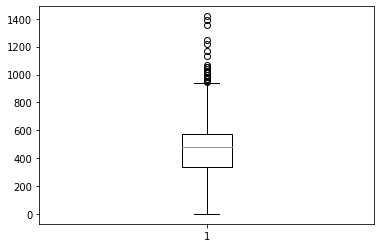

In [0]:
plt.boxplot(hp2_continue['garagearea'])
plt.show()

**Winsorize**

In [0]:
from scipy.stats.mstats import winsorize

In [0]:
hp2_continue['lotarea'] = winsorize(hp2_continue["lotarea"], (.05,.05))
hp2_continue['masvnrarea'] = winsorize(hp2_continue["masvnrarea"], (.05,.07))
hp2_continue['bsmtfinsf1'] = winsorize(hp2_continue["bsmtfinsf1"], (.05,.05))
hp2_continue['firstflrsf'] = winsorize(hp2_continue["firstflrsf"], (.05,.05))
hp2_continue['grlivarea'] = winsorize(hp2_continue["grlivarea"], (.05,.05))
hp2_continue['garagearea'] = winsorize(hp2_continue["garagearea"], (.05,.05))

**After winzorization**

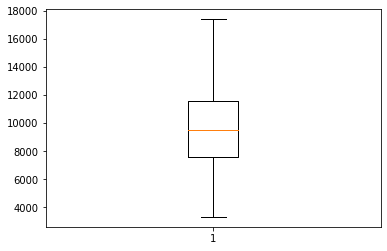

In [0]:
plt.boxplot(hp2_continue['lotarea'])
plt.show()

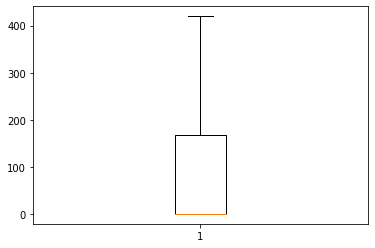

In [0]:
plt.boxplot(hp2_continue['masvnrarea'])
plt.show()

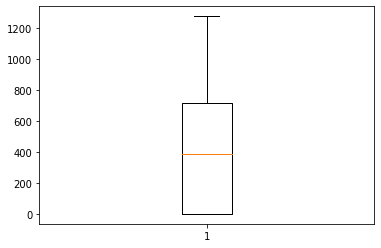

In [0]:
plt.boxplot(hp2_continue['bsmtfinsf1'])
plt.show()

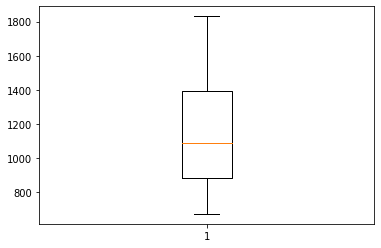

In [0]:
plt.boxplot(hp2_continue['firstflrsf'])
plt.show()

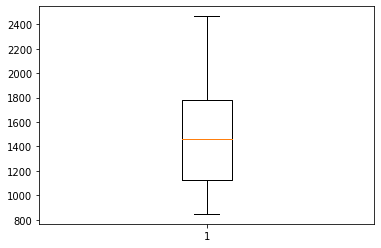

In [0]:
plt.boxplot(hp2_continue['grlivarea'])
plt.show()

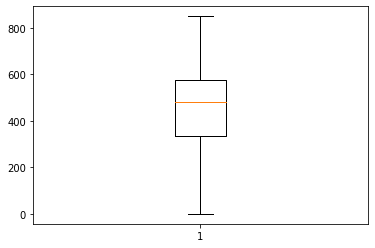

In [0]:
plt.boxplot(hp2_continue['garagearea'])
plt.show()

In [95]:
hp2_continue.head()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea
0,8450,196.0,706,856,1710,548
1,9600,0.0,978,1262,1262,460
2,11250,162.0,486,920,1786,608
3,9550,0.0,216,961,1717,642
4,14260,350.0,655,1145,2198,836


In [96]:
hp2.corr()

,id,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.007940,-0.015415,0.010496,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.140759,-0.238518,-0.251758,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.007683,-0.013585,-0.021407,-0.084284
lotarea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,-0.136841,-0.171098,-0.144203,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050298,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,-0.029815,-0.005965,-0.008201,0.477493
bsmtfinsf1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.003571,-0.015727,0.014359,0.386420
bsmtunfsf,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.023837,0.034888,-0.041258,0.214479


for col in fill_list:
  if type(col[0])!=str:
    z = np.abs(stats.zscore(hp2[col]))
 
print(z)

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(hp2))
print(z)

STILL 76 FEATURES

**WILL LOOK AT CORRELATION AND DROP FEATURES NEAR ZERO CORRELATION WITH SALEPRICE**

In [0]:

hp2=hp2.drop(columns=['id','mssubclass','overallcond','bsmthalfbath','miscval','yrsold','mosold'])

In [98]:
hp2.corr()

,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,saleprice
lotarea,1.000000,0.105806,0.014228,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,0.263116,0.158155,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.263843
overallqual,0.105806,1.000000,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,0.593007,0.111098,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.790982
yearbuilt,0.014228,0.572323,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,0.199010,0.187599,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.522897
yearremodadd,0.013788,0.550684,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,0.287389,0.119470,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.507101
masvnrarea,0.104160,0.411876,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,0.390857,0.085310,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.477493
bsmtfinsf1,0.214103,0.239666,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,0.208171,0.649212,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.386420
bsmtunfsf,-0.002618,0.308159,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,0.214479
totalbsmtsf,0.260833,0.537808,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,0.454868,0.307351,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.613581
firstflrsf,0.299475,0.476224,0.281986,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,0.566024,0.244671,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.605852
grlivarea,0.263116,0.593007,0.199010,0.287389,0.390857,0.208171,0.240257,0.454868,0.566024,1.000000,0.034836,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.708624


**NEXT FIND FEATURES HIGHLY CORRELATED WITH EACH OTHER**

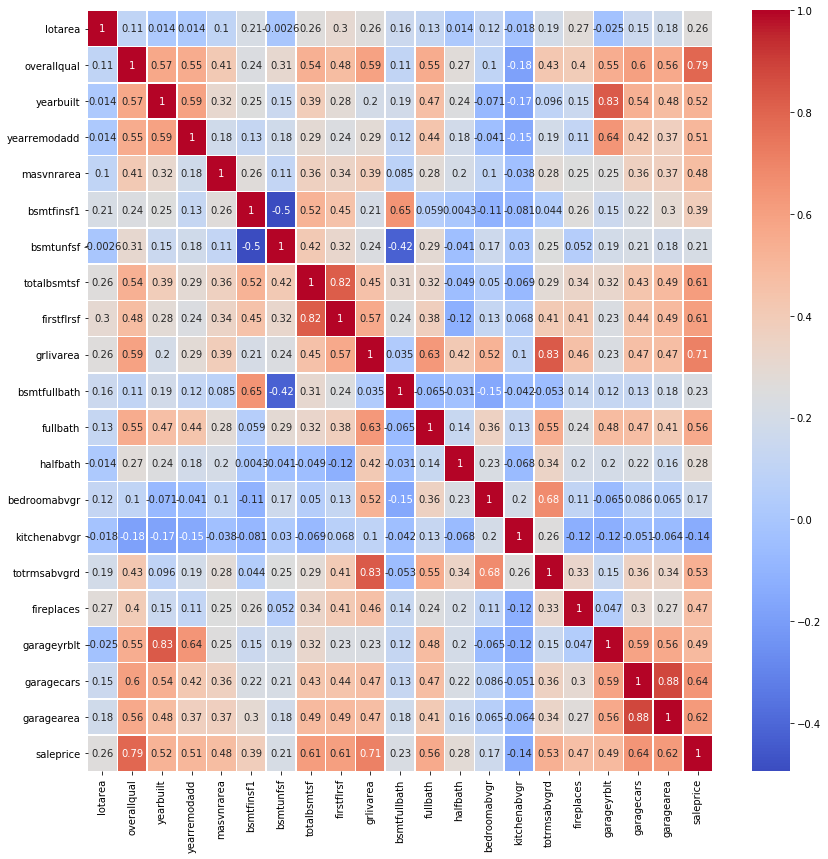

In [99]:
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(hp2.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

only found yearbuilt | garageyearbuilt--  totalrmsabvgrd  |grlivearea--GARAGCARS|GARAGE AREA

In [0]:
hp2=hp2.drop(columns=['totrmsabvgrd','garageyrblt','garagearea'],axis=1)

In [101]:
hp2.corr()

,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,fireplaces,garagecars,saleprice
lotarea,1.000000,0.105806,0.014228,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,0.263116,0.158155,0.126031,0.014259,0.119690,-0.017784,0.271364,0.154871,0.263843
overallqual,0.105806,1.000000,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,0.593007,0.111098,0.550600,0.273458,0.101676,-0.183882,0.396765,0.600671,0.790982
yearbuilt,0.014228,0.572323,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,0.199010,0.187599,0.468271,0.242656,-0.070651,-0.174800,0.147716,0.537850,0.522897
yearremodadd,0.013788,0.550684,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,0.287389,0.119470,0.439046,0.183331,-0.040581,-0.149598,0.112581,0.420622,0.507101
masvnrarea,0.104160,0.411876,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,0.390857,0.085310,0.276833,0.201444,0.102821,-0.037610,0.249070,0.364204,0.477493
bsmtfinsf1,0.214103,0.239666,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,0.208171,0.649212,0.058543,0.004262,-0.107355,-0.081007,0.260011,0.224054,0.386420
bsmtunfsf,-0.002618,0.308159,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.030086,0.051575,0.214175,0.214479
totalbsmtsf,0.260833,0.537808,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,0.454868,0.307351,0.323722,-0.048804,0.050450,-0.068901,0.339519,0.434585,0.613581
firstflrsf,0.299475,0.476224,0.281986,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,0.566024,0.244671,0.380637,-0.119916,0.127401,0.068101,0.410531,0.439317,0.605852
grlivarea,0.263116,0.593007,0.199010,0.287389,0.390857,0.208171,0.240257,0.454868,0.566024,1.000000,0.034836,0.630012,0.415772,0.521270,0.100063,0.461679,0.467247,0.708624


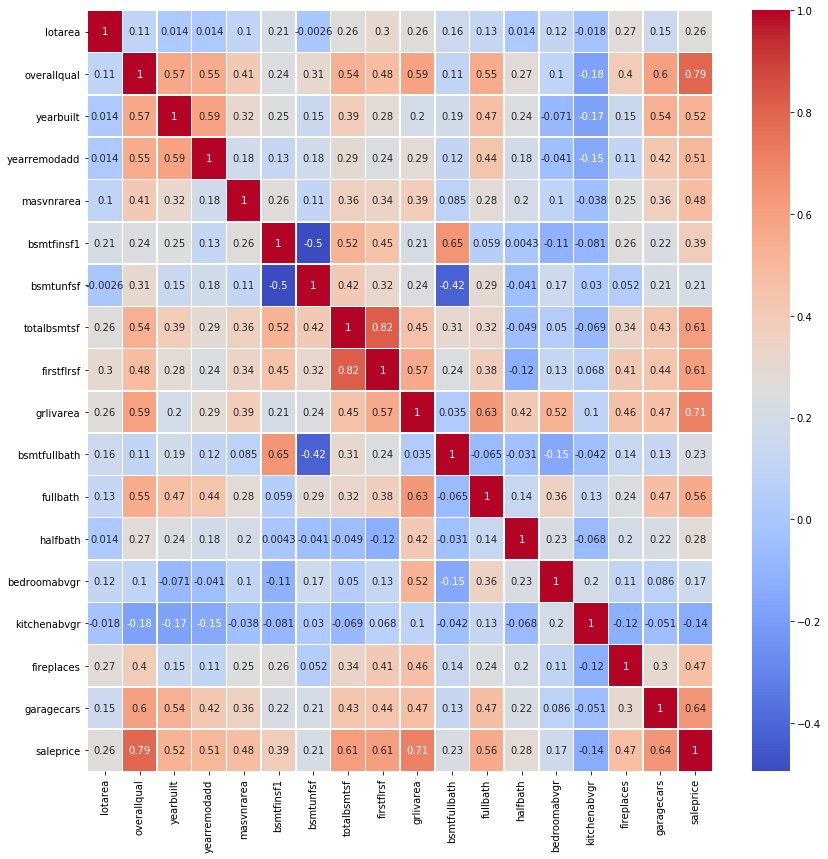

In [102]:
plt.figure(figsize=(14,14))
sns.heatmap(hp2.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

A few more highly correlated -- firstflrsf -- totalbassf

In [0]:
hp2=hp2.drop(columns=['totalbsmtsf'],axis=1)

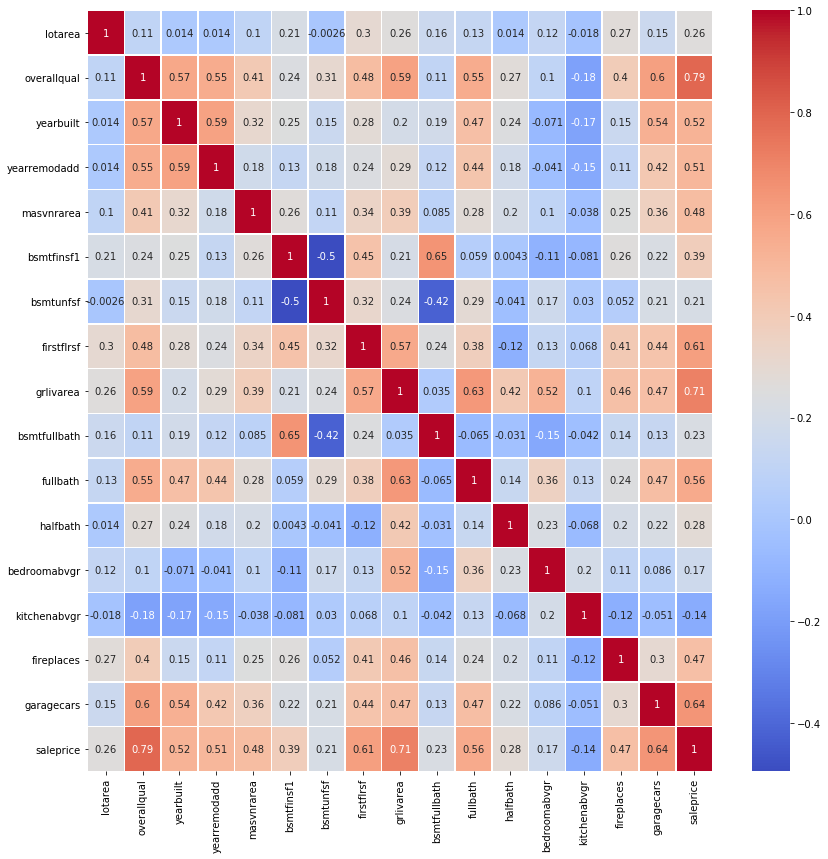

In [104]:
plt.figure(figsize=(14,14))
sns.heatmap(hp2.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

In [105]:
hp2.head(2)

,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,heating,heatingqc,centralair,electrical,firstflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,functional,fireplaces,garagetype,garagefinish,garagecars,garagequal,garagecond,paveddrive,saletype,salecondition,saleprice
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,GasA,Ex,Y,SBrkr,856,1710,1,2,1,3,1,Gd,Typ,0,Attchd,RFn,2,TA,TA,Y,WD,Normal,208500
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,GasA,Ex,Y,SBrkr,1262,1262,0,2,0,3,1,TA,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal,181500


**Will set cut off at .60**



overallqual, fistflsq,glivarea,garagecars

In [0]:
hp3=hp2[['overallqual','firstflrsf','grlivarea','garagecars','saleprice']]

In [107]:
hp3.head()

,overallqual,firstflrsf,grlivarea,garagecars,saleprice
0,7,856,1710,2,208500
1,6,1262,1262,2,181500
2,7,920,1786,2,223500
3,7,961,1717,3,140000
4,8,1145,2198,3,250000


In [0]:
target=hp3['saleprice']

In [0]:
hp4=hp3.drop(['saleprice'],axis=1)

**need ONE-HOT**

In [0]:
from sklearn.preprocessing import OneHotEncoder 

In [0]:
df = pd.get_dummies(hp4, columns=['overallqual','garagecars'],drop_first=True)

In [111]:
df.head()

,firstflrsf,grlivarea,overallqual_2,overallqual_3,overallqual_4,overallqual_5,overallqual_6,overallqual_7,overallqual_8,overallqual_9,overallqual_10,garagecars_1,garagecars_2,garagecars_3,garagecars_4
0,856,1710,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1262,1262,0,0,0,0,1,0,0,0,0,0,1,0,0
2,920,1786,0,0,0,0,0,1,0,0,0,0,1,0,0
3,961,1717,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1145,2198,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
X=df

In [0]:
Y=target

In [114]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     369.9
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        04:06:47   Log-Likelihood:                -17393.
No. Observations:                1460   AIC:                         3.482e+04
Df Residuals:                    1444   BIC:                         3.490e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.077e+04   2.57e+04      0.419      0.676   -3.97e+04    6.13e+04
firstflrsf        23.3106      3.205      7.274      0.000      17.024      29.597
grlivarea         40.3004      2.508     16.068      0.000      35.380      45.220
overallqual_2  -4897.2464   3.33e+04     -0.147      0.883   -7.02e+04    6.04e+04
overallqual_3  -9856.1364   2.71e+04     -0.364      0.716    -6.3e+04    4.33e+04
overallqual_4   1.474e+04   2.61e+04      0.564      0.573   -3.65e+04     6.6e+04
overallqual_5   2.778e+04   2.61e+04      1.065      0.287   -2.34e+04     7.9e+04
overallqual_6   4.213e+04   2.62e+04      1.611      0.107   -9171.401    9.34e+04
overallqual_7    6.87e+04   2.62e+04      2.619      0.009    1.72e+04     1.2e+05
overallqual_8    1.06e+05   2.64e+04      4.013      0.000    5.42e+04    1.58e+05
overallqual_9   1.746e+05    2.7e+04      6.470      0.000    1.22e+05    2.28e+05
overallqual_10  1.961e+05   2.81e+04      6.974      0.000    1.41e+05    2.51e+05
garagecars_1     1.42e+04   4594.339      3.090      0.002    5185.039    2.32e+04
garagecars_2    2.856e+04   4600.712      6.207      0.000    1.95e+04    3.76e+04
garagecars_3    6.449e+04   5858.495     11.007      0.000     5.3e+04     7.6e+04
garagecars_4    3.922e+04   1.68e+04      2.330      0.020    6195.227    7.22e+04
==============================================================================
Omnibus:                      490.320   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30982.951
Skew:                          -0.702   Prob(JB):                         0.00
Kurtosis:                      25.524   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#**ASSIGNMENT QUESTION 3**

Load the houseprices data from Thinkful's database.

Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?

Now, exclude the insignificant features from your model. Did anything change?

Interpret the statistically significant coefficients by quantifying their relations with the house prices.

 Which features have a more prominent effect on house prices?
 
Do the results sound reasonable to you? If not, try to explain the potential reasons.


iNSIGNIFICANT = OVERALLQUAL_2,_3,_4,_5, _6

In [0]:
list(X)

['const',
 'firstflrsf',
 'grlivarea',
 'overallqual_2',
 'overallqual_3',
 'overallqual_4',
 'overallqual_5',
 'overallqual_6',
 'overallqual_7',
 'overallqual_8',
 'overallqual_9',
 'overallqual_10',
 'garagecars_1',
 'garagecars_2',
 'garagecars_3',
 'garagecars_4']

In [0]:
fill_list=[ 'firstflrsf',
 'grlivarea',
 'overallqual_7',
 'overallqual_8',
 'overallqual_9',
 'overallqual_10',
 'garagecars_1',
 'garagecars_2',
 'garagecars_3',
 'garagecars_4']

In [0]:
X=df[fill_list]

In [119]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     520.7
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        04:08:20   Log-Likelihood:                -17431.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1449   BIC:                         3.494e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.795e+04   5314.822      5.258      0.000    1.75e+04    3.84e+04
firstflrsf        22.7919      3.268      6.974      0.000      16.381      29.203
grlivarea         44.7777      2.507     17.859      0.000      39.859      49.696
overallqual_7   3.416e+04   2707.118     12.619      0.000    2.89e+04    3.95e+04
overallqual_8   7.103e+04   3893.062     18.247      0.000    6.34e+04    7.87e+04
overallqual_9   1.399e+05   6836.156     20.470      0.000    1.27e+05    1.53e+05
overallqual_10  1.577e+05   1.02e+04     15.446      0.000    1.38e+05    1.78e+05
garagecars_1    2.137e+04   4567.930      4.677      0.000    1.24e+04    3.03e+04
garagecars_2    3.952e+04   4502.249      8.779      0.000    3.07e+04    4.84e+04
garagecars_3    7.318e+04   5886.672     12.431      0.000    6.16e+04    8.47e+04
garagecars_4    3.983e+04   1.72e+04      2.312      0.021    6036.930    7.36e+04
==============================================================================
Omnibus:                      525.405   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28425.532
Skew:                          -0.871   Prob(JB):                         0.00
Kurtosis:                      24.546   Cond. No.                     3.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OVERALL QUALITY 9 AND 10 HAVE MOST PROMINENT AFFECT ON PRICE

NOT SURPRISING AT 9 AND 10 ARE THE HIGHEST RATINGS FOR OVERALL QUALLITY